In [2]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
cond = df['Species'].isin(['Bream', 'Smelt'])

In [4]:
fish_data = df.loc[cond, ['Length2', 'Weight']]

In [6]:
fish_target = df.loc[cond, ['Species']]

In [7]:
fish_data.head()

,Length2,Weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [8]:
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [10]:
#자동으로 test, train 개수 나눠주는 함수 사용

from sklearn.model_selection import train_test_split

In [104]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=40)     

#train_test_split(arr 여러개 입력 필요- shape 같아야함, ..random=None, shuffle=None 등등..)
#train_input/test_input, trian_target/test_target 총 4개 데이터가 들어있는 리스트 제공
#a, b, c, d = [0, 1, 2, 3]
#random_state -> 고정값 생성
#stratify -> 클래스 분포 비율 맞춰줌

In [105]:
train_target

,Species
149,Smelt
156,Smelt
32,Bream
154,Smelt
152,Smelt
20,Bream
10,Bream
145,Smelt
26,Bream
9,Bream


In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
kn = KNeighborsClassifier()

In [59]:
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [60]:
kn.score(test_input, test_target)

1.0

In [61]:
kn.predict([[50, 300]])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

In [62]:
kn.predict([[25, 150]])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

In [63]:
import matplotlib.pyplot as plt

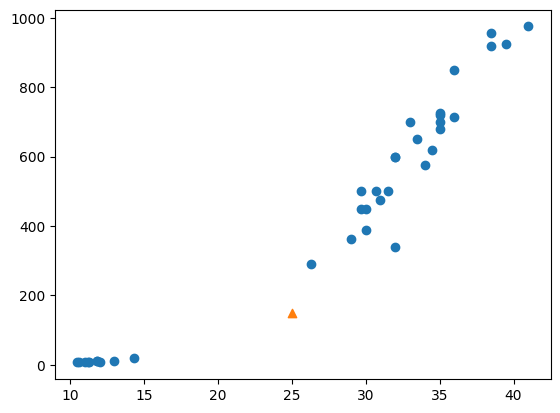

In [68]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')
plt.show()

In [76]:
kn.kneighbors([[25, 150]])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[130.73859415, 138.32150953, 140.00603558, 140.62090883,
         140.72046759]]),
 array([[24, 29, 31, 25,  8]]))

In [85]:
indexes = [[11, 20, 13, 22, 15]]

In [86]:
indexes

[[11, 20, 13, 22, 15]]

In [87]:
n_df = train_input.iloc[indexes[0]]

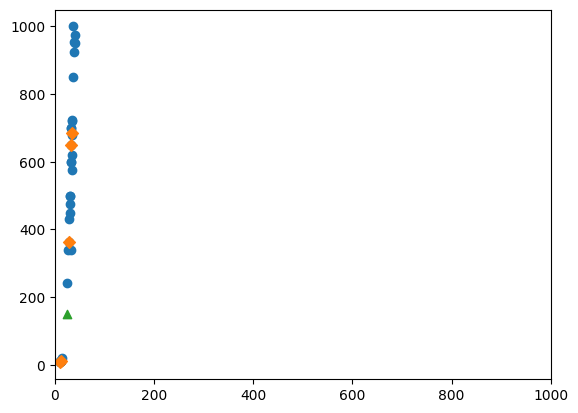

In [90]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(n_df['Length2'], n_df['Weight'], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlim(0, 1000)
plt.show()

- 표준점수

```
  (데이터) - (평균) / 표준편차
```

In [98]:
#표준점수(Z점수) - 내 점수와 평균 비교

mean = train_input.mean()   #평균

In [99]:
std = train_input.std()  #표준편차

In [100]:
train_input.head()

,Length2,Weight
149,11.2,9.8
156,13.0,12.2
32,39.5,925.0
154,12.2,12.2
152,11.8,9.9


In [101]:
(train_input - mean).head()

,Length2,Weight
149,-16.213889,-452.913889
156,-14.413889,-450.513889
32,12.086111,462.286111
154,-15.213889,-450.513889
152,-15.613889,-452.813889


In [107]:
#최종 공식

train_scaled = ((train_input - mean) / std)

In [108]:
#물어보고자 하는 데이터도 표준점수로 바꿔야함

new = ([25, 150] - mean) / std
new

Length2   -0.232394
Weight    -0.926813
dtype: float64

In [109]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [113]:
test_scaled = (test_input - mean) / std  #여기서 mean, std => train data 기준
kn.score(test_scaled, test_target)

1.0

In [114]:
kn.predict([new])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## 펭귄데이터 연습

In [507]:
import seaborn as sns

In [538]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [605]:
df = df.dropna() #nan 값 삭제

In [581]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [582]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [583]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [585]:
df.groupby('species').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


In [586]:
cond = df['species'].isin(['Adelie', 'Gentoo'])

In [587]:
pg_data = df.loc[cond, ['flipper_length_mm', 'bill_length_mm']]

In [588]:
pg_target = df.loc[cond, ['species']]

In [589]:
pg_data.head()

,flipper_length_mm,bill_length_mm
0,181.0,39.1
1,186.0,39.5
2,195.0,40.3
4,193.0,36.7
5,190.0,39.3


In [590]:
pg_data = pg_data.fillna(pg_data.mean())

In [591]:
pg_data.head()

,flipper_length_mm,bill_length_mm
0,181.0,39.1
1,186.0,39.5
2,195.0,40.3
4,193.0,36.7
5,190.0,39.3


In [592]:
from sklearn.model_selection import train_test_split

In [593]:
train_input, test_input, train_target, test_target = train_test_split(pg_data, pg_target, stratify=pg_target, random_state=150)

In [594]:
from sklearn.neighbors import KNeighborsClassifier

In [595]:
kn = KNeighborsClassifier()

In [596]:
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [597]:
kn.score(test_input, test_target)

1.0

In [598]:
import matplotlib.pyplot as plt

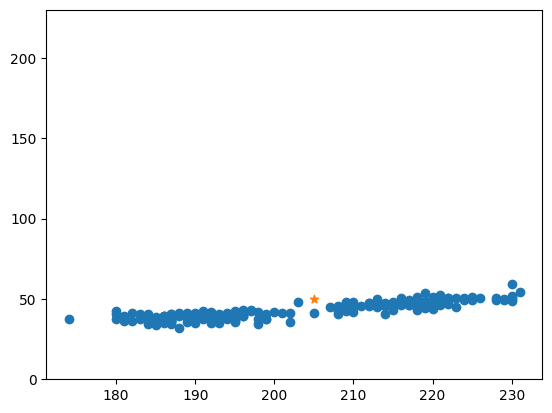

In [609]:
plt.scatter(train_input['flipper_length_mm'], train_input['bill_length_mm'])
plt.scatter(205, 50, marker='*')
plt.ylim(0, 230)
plt.show()

In [610]:
kn.kneighbors([[205, 50]])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[208.47012093, 208.63478861, 208.79641743, 208.82292431,
         208.89835085]]),
 array([[113, 156, 151,  43, 143]]))

In [611]:
mean = train_input.mean()
std = train_input.std()

train_scaled = ((train_input - mean) / std)
new = ([205, 50] - mean) / std

In [612]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [613]:
test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)

1.0

In [614]:
kn.predict([new])

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)